In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [110]:
## Epsilon Greedy experiement
def plot(targets, cRegret):
    x = np.linspace(0, 1, 200)
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
    for t in targets:
        y = ss.beta.pdf(x, t.a, t.b)
        ax1.plot(x, y/y.sum(), label="(p,a,b,n)=({:.2f},{:d},{:d},{:d})".format(t.p_mean, t.a, t.b, t.n))
        ax1.legend(loc=2)
    ax1.set_title('probability distribution of respond rate')
    ax2.plot(cRegret)
    ax2.set_title('cumulative regret')  
    
class Target(object):
    def __init__(self,p_mean,p_sigma):
        self.p_mean = p_mean
        self.p_sigma = p_sigma
        self.a = 1
        self.b = 1
        self.n = 0
        
    def trigger(self):
        return np.random.random() < np.random.normal(loc=self.p_mean, scale=self.p_sigma)
    
    def sample(self):
        return np.random.beta(self.a, self.b)
        
    def prob(self):
        return self.a/(self.a + self.b)
    
    def update(self, x):
        self.a += x
        self.b += 1 - x
        self.n += 1

    
def experiment():
    Targets = [Target(p,s) for p,s in zip(p_means,p_sigmas)] #Creste customer for epsilon greedy 
    n_pulling = [0,0,0]
    regret = 0
    cumulative_regret = []
    
    for i in range(num_trails):
        best_target = None
        max_prob = -1
        test = np.random.random()
        if test < epsilon: #with probability epsilon, we explore more data
            index = np.random.randint(0,len(Targets))
            best_target = Targets[index]
        else: 
            for n,target in enumerate(Targets):
                prob = target.prob()
                if prob > max_prob:
                    maxprob = prob
                    best_target = target
                    index = n
                    
        x = best_target.trigger()
        best_target.update(x)
        regret += optimal_expectation-x
        cumulative_regret.append(regret)

    plot(Targets, cumulative_regret)

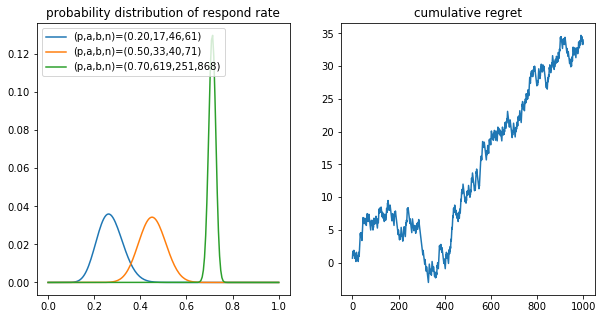

In [111]:
num_trails = 1000
p_means = [0.2, 0.5, 0.7]
p_sigmas = [0.1, 0.1, 0.1]
optimal = max(p_means)
epsilon = 0.2
experiment()

In [130]:
def plot(all_targets, cRegret, trail):
    x = np.linspace(0, 1, 200)
    names = ['EG','TS']
    linestyles = ['-','-.']
    colors = ['r','b','g']
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
    for i, targets in enumerate(all_targets):
        for j, t in enumerate(targets):
            y = ss.beta.pdf(x, t.a, t.b)
            ax1.plot(x, y/y.sum(),
                     color = colors[j],
                     linestyle = linestyles[i],
                     label="{:s}(p,a,b,n)=({:.2f},{:d},{:d},{:d})".format(names[i],t.p_mean, t.a, t.b, t.n))
            ax1.legend(loc=2)
    ax1.set_title('probability distribution of respond rate')
    ax2.plot(cRegret[0],label='Epsilon Greedy')
    ax2.plot(cRegret[1],label='Thompson Sampling')
    ax2.set_title('cumulative regret')  
    ax2.legend()
    fig.show()

def plot_posterior(all_targets, trial):
    x = np.linspace(0, 1, 200)
    names = ['EG','TS']
    linestyles = ['-','-.']
    colors = ['r','b','g']
    for i, targets in enumerate(all_targets):
        for j, t in enumerate(targets):
            y = ss.beta.pdf(x, t.a, t.b)
            plt.plot(x, y/y.sum(), 
                     color = colors[j],
                     linestyle = linestyles[i],
                     label="{:s}(p,a,b,n)=({:.2f},{:d},{:d},{:d})".format(names[i],t.p_mean, t.a, t.b, t.n))
    plt.title("posterior distributions after %s trials" % trial)
    plt.legend()
    plt.show()
    
def experiment():
    sample_points = [50, 200, 500, 1000, 2000]
    #Epsilon Greedy
    Targets_EG = [Target(p,s) for p,s in zip(p_means,p_sigmas)] #Creste customer for epsilon greedy 
    
    #Thompson Sampling
    Targets_TS = [Target(p,s) for p,s in zip(p_means,p_sigmas)]
    
    Targets_all = [Targets_EG, Targets_TS]
    cumulative_reward = [], []
    cumulative_regret = [], []
    reward = [0, 0]
    regret = [0, 0]
    for i in range(num_trails):
        best_target = [None, None]
        max_prob = [-1, -1]
        index = [0, 0]
        
        #Epsilon Greedy
        test = np.random.random()
        if (test < epsilon): #with probability epsilon, we explore more data. Cold start.
            index[0] = np.random.randint(0,len(Targets_EG))
            best_target[0] = Targets_EG[index[0]]
        else: 
            for n, target in enumerate(Targets_EG):
                prob = target.prob()
                if prob > max_prob[0]:
                    max_prob[0] = prob
                    best_target[0] = target
                    index[0] = n
        
        #Thompson Sampling
        for n, target in enumerate(Targets_TS):
            sample = target.sample()
            if sample > max_prob[1]:
                max_prob[1] = sample
                best_target[1] = target
                index[1] = n
                    
        for k in [0,1]:
            x = best_target[k].trigger()
            best_target[k].n += 1
            best_target[k].update(x)
            regret[k] += optimal_expectation - x
            cumulative_regret[k].append(regret[k])        
        if i in sample_points:
            plot_posterior(Targets_all,i)
            
    plot(Targets_all,cumulative_regret,num_trails)

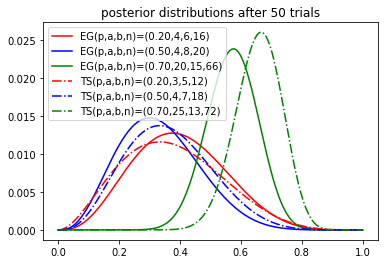

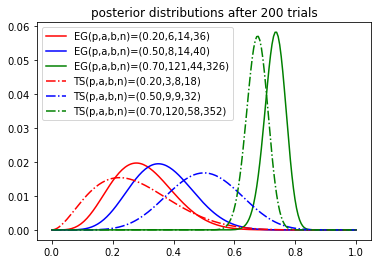

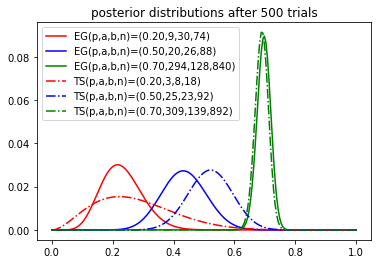

/Users/yhhsu/Anaconda/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


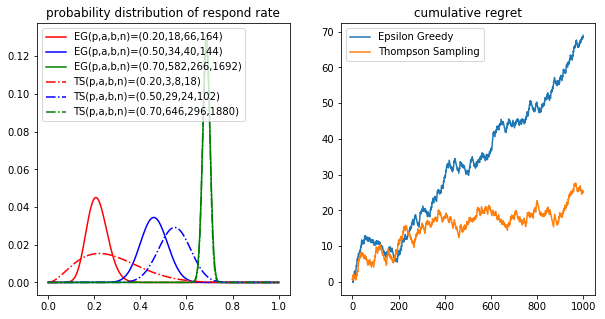

In [131]:
num_trails = 1000
p_means = [0.2, 0.5, 0.7]
p_sigmas = [0.1, 0.1, 0.1]
optimal = max(p_means)
epsilon = 0.2
experiment()